In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Preview of Data
print("Shape : ",df.shape)

Shape :  (891, 12)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
#Check for DUPLICATES & NULL values
print("Duplicates : ",df.duplicated().sum())
print("Null values : \n\n",df.isnull().sum())

Duplicates :  0
Null values : 

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


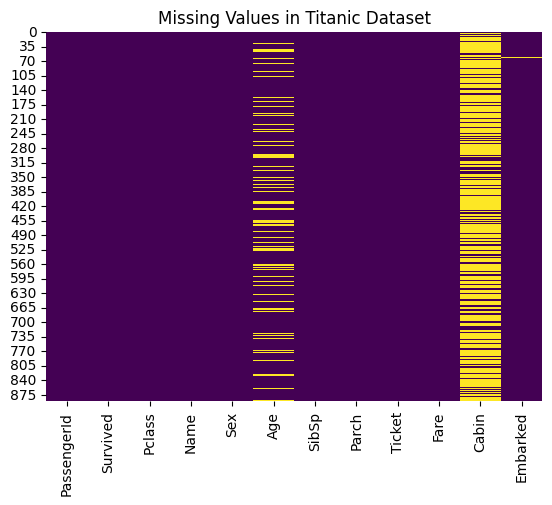

In [67]:
# Missing data heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Titanic Dataset")
plt.show()


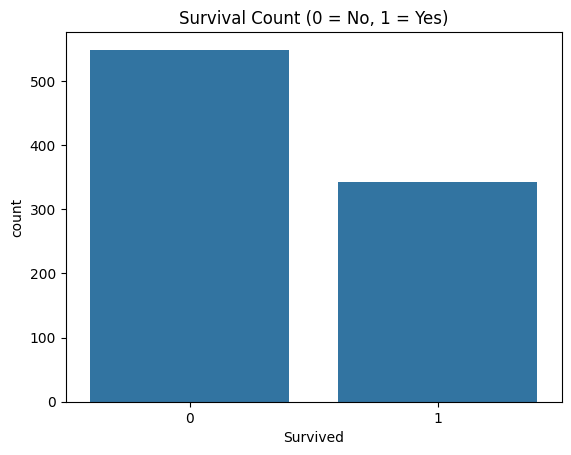

In [68]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

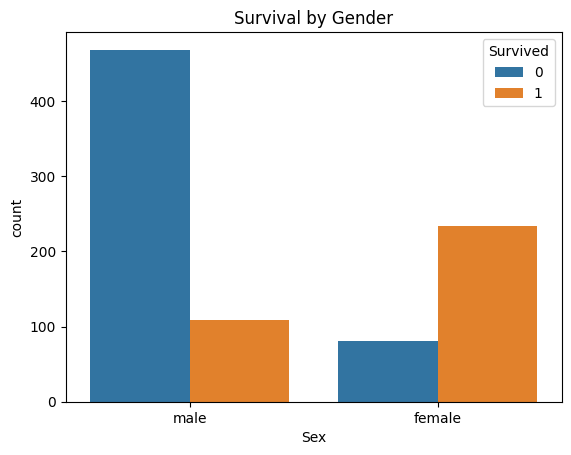

In [69]:
# Gender vs Survival
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


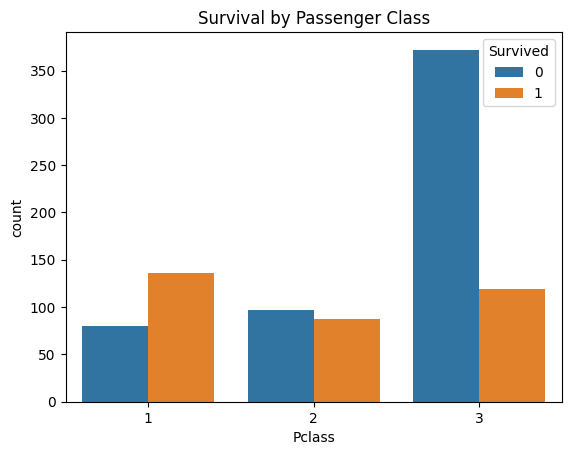

In [70]:
# Pclass vs Survival
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

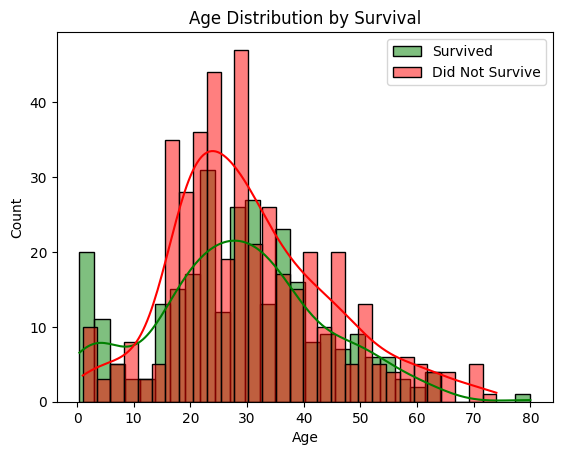

In [71]:
# Age distribution by survival
sns.histplot(df[df['Survived'] == 1]['Age'], color='green', label='Survived', kde=True, bins=30)
sns.histplot(df[df['Survived'] == 0]['Age'], color='red', label='Did Not Survive', kde=True, bins=30)
plt.legend()
plt.title("Age Distribution by Survival")
plt.show()

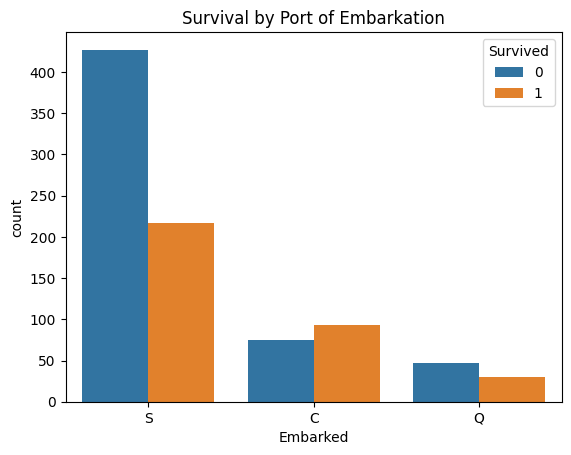

In [72]:
# Embarked vs Survival
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Port of Embarkation")
plt.show()

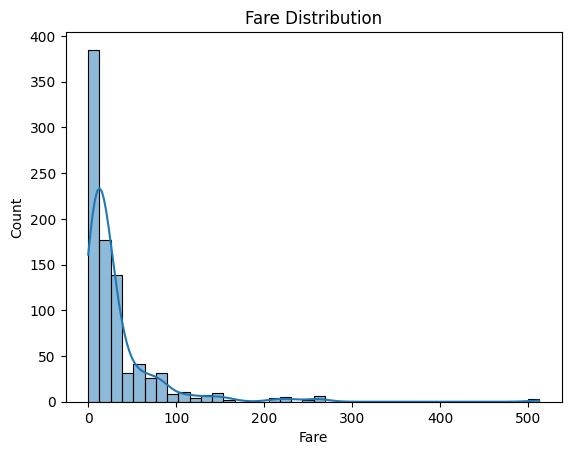

In [73]:
# Fare distribution
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()


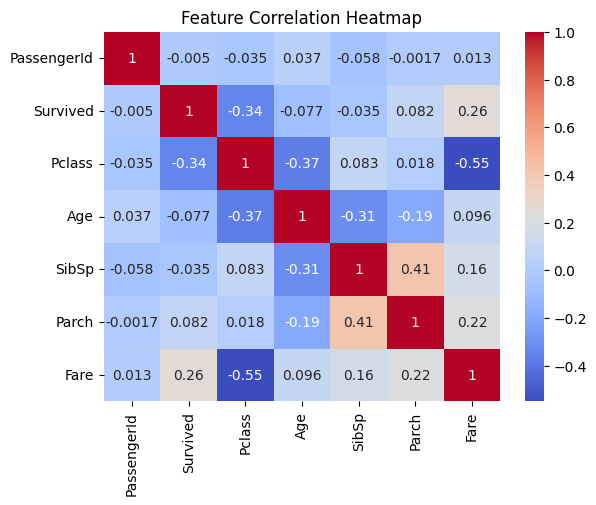

In [74]:
# Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [75]:
# Data Cleaning 
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)


In [76]:
# Checking for null values again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [77]:
# Feature Engineering 
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
df['Title'] = df['Title'].replace(['Countess', 'Lady', 'Sir', 'Don', 'Dona', 'Jonkheer'], 'Rare')

In [78]:

# One-hot encode 'Embarked' 
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
# Create FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [79]:
# Drop unused columns
df.drop(['Name', 'PassengerId'], axis=1, inplace=True)


In [48]:
# Split Data
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Feature Scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
#  Logistic Regression with Grid Search 
lr= LogisticRegression()

lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [58]:
print(" Logistic Regression ")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

 Logistic Regression 
Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [52]:
#  Decision Tree with Grid Search 
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_
dt_preds = dt_best.predict(X_test)

In [53]:
print("Decision Tree")
print("Best Params:", dt_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))


Decision Tree
Best Params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [54]:
#  Random Forest with Grid Search 
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 4, 6, 8],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_preds = rf_best.predict(X_test)

In [55]:
print("Random Forest ")
print("Best Params:", rf_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest 
Best Params: {'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [59]:
# Final Accuracy Comparison
model_scores = {
    'Logistic Regression': accuracy_score(y_test, lr_preds),
    'Decision Tree': accuracy_score(y_test, dt_preds),
    'Random Forest': accuracy_score(y_test, rf_preds)
}

print("\nFinal Model Accuracies")
for model, score in model_scores.items():
    print(f"{model}: {score:.4f}")


Final Model Accuracies
Logistic Regression: 0.8156
Decision Tree: 0.8045
Random Forest: 0.8212
